# Lending Club Case Study

## Lending Club Case Study: Problem Statement

### Business Understanding

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

><font color = blue>***1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company***</font>

><font color = blue>***2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company***</font>

The data given below contains information about past loan applicants and whether they **‘defaulted’** or not. 


**`The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.`**



When a person applies for a loan, there are two types of decisions that could be taken by the company:

><font color = blue>**1. Loan accepted:**</font> If the company approves the loan, there are 3 possible scenarios described below:

>><font color = blue>***Fully paid:***</font> Applicant has fully paid the loan (the principal and the interest rate)

>><font color = blue>***Current:***</font> Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

>><font color = blue>***Charged-off:***</font> Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan.

><font color = blue>**2. Loan rejected:**</font> The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

### Business Objectives
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 


**`If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.`**


**`In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.`**

### Results Expected
1. Write all your code in one well-commented Python file; briefly mention the insights and observations from the analysis.
2. Present the overall approach of the analysis in a presentation:

>-  Mention the problem statement and the analysis approach briefly.

>-  Explain the results of univariate, bivariate analysis etc. in business terms.

>-  Include visualisations and summarise the most important results in the presentation.

# Data Sourcing

## Data Sourcing: Import required libraries

In [2179]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(style="whitegrid")

## Data Sourcing: Load the data

In [2180]:
# Load the data dictionary of loan data
loan_data_dict = pd.read_excel('Data_Dictionary.xlsx')

# Load the loan data
loan_data = pd.read_csv('loan.csv')

# Data Cleaning

## Data Cleaning: Explore

In [2181]:
# To refer and understand the column descriptions using the data dictionary
pd.options.display.max_colwidth = 300
loan_data_dict.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.


In [2182]:
# Check the attributes of the loan data
print(loan_data.shape)
print(loan_data.info())
print(loan_data.dtypes)

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


In [2229]:
# Check head of the data for multiple header
loan_data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_month,issue_year,loan_amnt_range,int_rate_range,installment_range,annual_inc_range,dti_range,loan_inc_ratio
0,5000,36,10.65,162.87,b,b2,10.0,rent,24000.0,verified,0,credit_card,az,27.65,0.0,12,2011,0-5000,9%-13%,0-250,0-25000,25-30,0.208333
1,2500,60,15.27,59.83,c,c4,0.0,rent,30000.0,source verified,1,car,ga,1.00,0.0,12,2011,0-5000,13%-17%,0-250,25000-50000,0-5,0.083333
2,2400,36,15.96,84.33,c,c5,10.0,rent,12252.0,not verified,0,small_business,il,8.72,0.0,12,2011,0-5000,13%-17%,0-250,0-25000,5-10,0.195886
3,10000,36,13.49,339.31,c,c1,10.0,rent,49200.0,source verified,0,other,ca,20.00,0.0,12,2011,5000-10000,13%-17%,250-500,25000-50000,15-20,0.203252
5,5000,36,7.90,156.46,a,a4,3.0,rent,36000.0,source verified,0,wedding,az,11.20,0.0,12,2011,0-5000,5%-9%,0-250,25000-50000,10-15,0.138889


In [2230]:
# Check tail of the data for multiple footer rows
loan_data.tail()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_month,issue_year,loan_amnt_range,int_rate_range,installment_range,annual_inc_range,dti_range,loan_inc_ratio
39712,2500,36,8.07,78.42,a,a4,4.0,mortgage,110000.0,not verified,0,home_improvement,co,11.33,NaN,7,2007,0-5000,5%-9%,0-250,100000 and above,10-15,0.022727
39713,8500,36,10.28,275.38,c,c1,3.0,rent,18000.0,not verified,0,credit_card,nc,6.40,NaN,7,2007,5000-10000,9%-13%,250-500,0-25000,5-10,0.472222
39714,5000,36,8.07,156.84,a,a4,0.0,mortgage,100000.0,not verified,0,debt_consolidation,ma,2.30,NaN,7,2007,0-5000,5%-9%,0-250,75000-100000,0-5,0.050000
39715,5000,36,7.43,155.38,a,a2,0.0,mortgage,200000.0,not verified,0,other,md,3.72,NaN,7,2007,0-5000,5%-9%,0-250,100000 and above,0-5,0.025000
39716,7500,36,13.75,255.43,e,e2,0.0,own,22000.0,not verified,0,debt_consolidation,ma,14.29,NaN,6,2007,5000-10000,13%-17%,250-500,0-25000,10-15,0.340909


### Observations:
1. No summary rows or multiple header and footer rows.
2. Columns are a mix of integer, floats and objects.
3. Lots of NAN columns at the end.
4. Various columns need cleaning in the dataset in terms of string removal. For e.g. - '36 months', '10.65%'.

## Data Cleaning: Fixing Rows and Columns

In [2185]:
# Check for empty rows and columns
print(loan_data.isnull().all(axis=1).sum())
print(loan_data.isnull().all(axis=0).sum())

0
54


In [2186]:
# Drop all empty columns.
loan_data.dropna(axis=1, how='all', inplace=True)

In [2187]:
# Columns having single value?
loan_data.columns[loan_data.nunique() == 1]

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [2188]:
# Drop these columns as they have a single value which won't help our EDA.
loan_data.drop(loan_data.columns[loan_data.nunique() == 1], axis=1, inplace=True)

In [2189]:
# Check any highly correleated and similar data columns
print(loan_data.loan_amnt.corr(loan_data.funded_amnt))
print(loan_data.loan_amnt.corr(loan_data.funded_amnt_inv))

0.981578218823763
0.9400335348163555


In [2190]:
# Drop 2 out of 3 correlated columns and keep only loan_amnt as others don't give any extra info in our EDA

loan_data.drop('funded_amnt', axis=1, inplace=True)
loan_data.drop('funded_amnt_inv', axis=1, inplace=True)

In [2191]:
# Load the description of these remaining columns from data dictionary
loan_data_dict[loan_data_dict['LoanStatNew'].isin(loan_data.columns.tolist())]

,LoanStatNew,Description
2,addr_state,The state provided by the borrower in the loan application
4,annual_inc,The self-reported annual income provided by the borrower during registration.
11,collection_recovery_fee,post charge off collection fee
13,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
15,desc,Loan description provided by the borrower
16,dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
18,earliest_cr_line,The month the borrower's earliest reported credit line was opened
19,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
20,emp_title,The job title supplied by the Borrower when applying for the loan.*
25,grade,LC assigned loan grade


In [2192]:
# Drop the irrelevant columns identified
irrelevant_columns = ['id', 'member_id', 'emp_title', 'url', 'desc', 'title', 'delinq_2yrs',
                      'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 
                      'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
                      'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
                      'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                      'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d']
loan_data.drop(irrelevant_columns, axis=1, inplace=True)

### Observations
1. Out of 111 columns, 54 columns are empty.
2. There are 9 columns with single value.
3. There are 3 highly correlated columns, two of them were dropped.
3. Columns below are identifiers and irrelevant for our EDA:

>-  "id", "member_id", "url"

4. Below columns are descriptive in nature and have too many unique value which makes them irrelevant for our EDA.

>-  "desc", 'title', 'emp_title'

5. As the company wants to understand the driving factors (or driver variables) behind loan default at the time of the application itself, the **customer behavior variables** can't be used as predictors for credit approval as they will be not available at the time of loan application.

>- 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
   'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
   'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
   'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
   'next_pymnt_d', 'last_credit_pull_d'

## Data Cleaning: Missing Values

In [2193]:
# Column 'zip_code' is having "XX" missing string 
loan_data.drop('zip_code', axis=1, inplace=True)

In [2194]:
# Columns having missing values?
loan_data.columns[loan_data.isnull().sum() > 0]

Index(['emp_length', 'mths_since_last_delinq', 'mths_since_last_record',
       'pub_rec_bankruptcies'],
      dtype='object')

In [2195]:
# Columns having more than 50% values missing
loan_data.columns[loan_data.isnull().sum() > len(loan_data)*.5]

Index(['mths_since_last_delinq', 'mths_since_last_record'], dtype='object')

In [2196]:
# Drop columns having more than 50% values missing as they will not contribute to our analysis
loan_data.drop(loan_data.columns[loan_data.isnull().sum() > len(loan_data)*.5], axis=1, inplace=True)

In [2197]:
# Impute strategy for emp_length column
print(loan_data.emp_length.isnull().value_counts())
print(loan_data.emp_length.value_counts())

False    38642
True      1075
Name: emp_length, dtype: int64
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64


In [2198]:
# Impute strategy for pub_rec_bankruptcies column
print(loan_data.pub_rec_bankruptcies.isnull().value_counts())
print(loan_data.pub_rec_bankruptcies.value_counts())

False    39020
True       697
Name: pub_rec_bankruptcies, dtype: int64
0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64


### Observations
1. As 'zip_code' has last two digit missing 'XX' we will drop it.

2. Below coulumns have more than 50% values missing which makes them unusable for our analysis, hence can be dropped.

>-  'mths_since_last_delinq', 'mths_since_last_record'

3. Out of remaining columns, below coulumns still have empty values which we will keep as it is for now to avoid risking exaggerating the existing data in the columns. However, we can use below thought process **to impute the values** if needed.

>- For 'emp_length' as the null values are 1075 and the data is spread across 11 categories, we do run a risk of exaggerating the existing data. However, we can go ahead with **mode if it is absolutely necessary to impute the data**

>- For 'pub_rec_bankruptcies' as the null values are only 697 and '0.0' value by far has the highest frequency i.e. 37339, we can **safely use mode** and replace all 697 null values with '0.0'.

## Data Cleaning: Standardising Values

In [2199]:
# Check term column
loan_data.term.value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [2200]:
# Strip " months" from term column and convert it into integer
loan_data['term'] = loan_data['term'].str.rstrip(' months').astype(int)

In [2201]:
# Check int_rate column
loan_data.int_rate.head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
4    12.69%
Name: int_rate, dtype: object

In [2202]:
# Strip "%" from int_rate column
loan_data['int_rate'] = loan_data['int_rate'].str.rstrip('%').astype(float)

In [2203]:
# Check emp_length column
loan_data.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [2204]:
# Create an employee length dict and replace the values in the column.

emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}
loan_data = loan_data.replace({"emp_length": emp_length_dict })

In [2205]:
loan_data = loan_data.applymap(lambda s:s.lower() if type(s) == str else s)

### Observations
1. Removed extra characters from 'term' and 'int_rate'. Also created a dict for 'emp_length' and converted them to int or float.
2. Stanardised case to lower for all columns


## Data Cleaning: Invalid Values

In [2206]:
# Convert 'issue_d' column datatype to datetime
loan_data['issue_d'] = loan_data['issue_d'].apply(lambda row: datetime.strptime(row,'%b-%y'))

In [2207]:
# Derive year and month column from 'issue_d' and drop it
loan_data['issue_month'] = loan_data['issue_d'].dt.month
loan_data['issue_year'] = loan_data['issue_d'].dt.year
loan_data.drop('issue_d', axis=1, inplace=True)

In [2208]:
# Check min, max and other values to find invalid values
loan_data.describe()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,pub_rec_bankruptcies,issue_month,issue_year
count,39717.000000,39717.000000,39717.000000,39717.000000,38642.000000,3.971700e+04,39717.000000,39020.000000,39717.000000,39717.000000
mean,11219.443815,42.418007,12.021177,324.561922,4.973449,6.896893e+04,13.315130,0.043260,7.172168,2010.328902
std,7456.670694,10.622815,3.724825,208.874874,3.562580,6.379377e+04,6.678594,0.204324,3.396910,0.877514
min,500.000000,36.000000,5.420000,15.690000,0.000000,4.000000e+03,0.000000,0.000000,1.000000,2007.000000
25%,5500.000000,36.000000,9.250000,167.020000,2.000000,4.040400e+04,8.170000,0.000000,4.000000,2010.000000
50%,10000.000000,36.000000,11.860000,280.220000,4.000000,5.900000e+04,13.400000,0.000000,7.000000,2011.000000
75%,15000.000000,60.000000,14.590000,430.780000,9.000000,8.230000e+04,18.600000,0.000000,10.000000,2011.000000
max,35000.000000,60.000000,24.590000,1305.190000,10.000000,6.000000e+06,29.990000,2.000000,12.000000,2011.000000


### Observations
1. **'issue_d'** column which was as object datatype was converted into datetime
2. **issue_month** and **issue_year** column was extracted from **issue_d** and then it was dropped.

## Data Cleaning: Filtering Data

In [2209]:
# Check loan_status column
loan_data['loan_status'].value_counts()

fully paid     32950
charged off     5627
current         1140
Name: loan_status, dtype: int64

In [2210]:
# Drop current category of loan_status column
loan_data = loan_data[~(loan_data['loan_status'] == 'current')]
loan_data.shape

(38577, 17)

In [2211]:
# We can tag 'fully paid' as 0 and 'charged off' as 1 for ease of analysis.

loan_status_dict = {
    'fully paid' : 0,
    'charged off' : 1
}
loan_data = loan_data.replace({"loan_status": loan_status_dict })

In [2212]:
# Filter a defaulter dataset for further analysis and drop loan_status in that

loan_data_defaulted = loan_data[~(loan_data['loan_status'] == 0)]
loan_data_defaulted.drop('loan_status', axis=1, inplace=True)

In [2213]:
# Drop duplicate values if any

loan_data.drop_duplicates()
loan_data.shape

(38577, 17)

### Observations
1. "Current" category of loan_status column can be filtered out as it doesnt help in our analysis for approving or rejecting application.
2. Also, we can tag 'fully paid' as 0 and 'charged off' as 1 for ease of analysis.
3. Drop duplicates if any.

## Data Cleaning: Summary / Insights

**`After cleaning the data from perspective of fixing rows and columns, missing values, standardising values, invalid values and filtering, there are only 17 columns and 38577 rows which is useful for our further analysis.`**

# Univariate Analysis

## Univariate Analysis: Data Description

In [2214]:
# Load the data description of these remaining columns from data dictionary
loan_data_dict[loan_data_dict['LoanStatNew'].isin(loan_data.columns.tolist())]

,LoanStatNew,Description
2,addr_state,The state provided by the borrower in the loan application
4,annual_inc,The self-reported annual income provided by the borrower during registration.
16,dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
19,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
25,grade,LC assigned loan grade
26,home_ownership,"The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER."
33,installment,The monthly payment owed by the borrower if the loan originates.
34,int_rate,Interest Rate on the loan
41,loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
42,loan_status,Current status of the loan


In [2215]:
# Check type of variables
loan_data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_month,issue_year
0,5000,36,10.65,162.87,b,b2,10.0,rent,24000.0,verified,0,credit_card,az,27.65,0.0,12,2011
1,2500,60,15.27,59.83,c,c4,0.0,rent,30000.0,source verified,1,car,ga,1.00,0.0,12,2011
2,2400,36,15.96,84.33,c,c5,10.0,rent,12252.0,not verified,0,small_business,il,8.72,0.0,12,2011
3,10000,36,13.49,339.31,c,c1,10.0,rent,49200.0,source verified,0,other,ca,20.00,0.0,12,2011
5,5000,36,7.90,156.46,a,a4,3.0,rent,36000.0,source verified,0,wedding,az,11.20,0.0,12,2011


### Observations
1. Categorical variables: Unordered - 3

> 'home_ownership', 'purpose', 'addr_state'

2. Categorical variables: Ordered - 9

> 'term', 'grade', 'sub_grade', 'emp_length', 'verification_status', 'loan_status', 'pub_rec_bankruptcies', issue_year, issue_month

3. Quantitative / numeric variables - 5

> 'loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti'

## Univariate Analysis: Unordered Categorical Variables

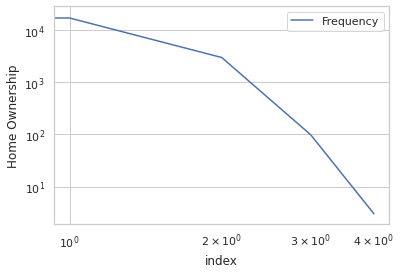

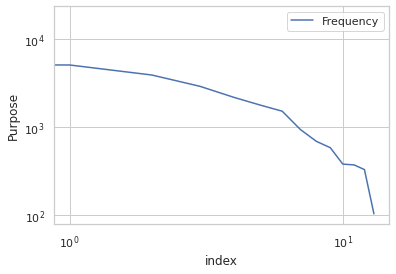

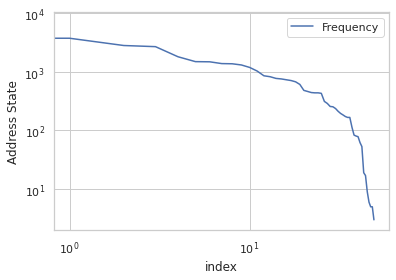

In [2216]:
# Rank-frequency plots of unordered categorical variables on log-log scale; 

# Column: 'home_ownership'
df = loan_data['home_ownership'].value_counts().rename_axis('Home Ownership').reset_index(name='Frequency')
df.reset_index(inplace=True)
# print(df)
df1 = pd.DataFrame(data=df['Frequency'], index = df['index'])
df1.plot(loglog=True)
plt.ylabel('Home Ownership')
plt.show()

# Column: 'purpose'
df = loan_data['purpose'].value_counts().rename_axis('Purpose').reset_index(name='Frequency')
df.reset_index(inplace=True)
# print(df)
df1 = pd.DataFrame(data=df['Frequency'], index = df['index'])
df1.plot(loglog=True)
plt.ylabel('Purpose')
plt.show()

# Column: 'addr_state'
df = loan_data['addr_state'].value_counts().rename_axis('Address State').reset_index(name='Frequency')
df.reset_index(inplace=True)
# print(df)
df1 = pd.DataFrame(data=df['Frequency'], index = df['index'])
df1.plot(loglog=True)
plt.ylabel('Address State')
plt.show()

In [2217]:
# Writing a function to plot countplots of different categorical variables to do univariate analysis

def count_plotter(x_var,df,x_label,title,hue_var=None,rot_flag=0,fig_size_x=15,fig_size_y=6):
    ncount = len(df)
    dims = (fig_size_x,fig_size_y)
    plt.figure(figsize=dims)
    ax = sns.countplot(x=x_var, data=df,hue=hue_var,palette="Set3")
    plt.title(title)
    plt.xlabel(x_label)

    if(rot_flag==1):
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
        plt.tight_layout()

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text

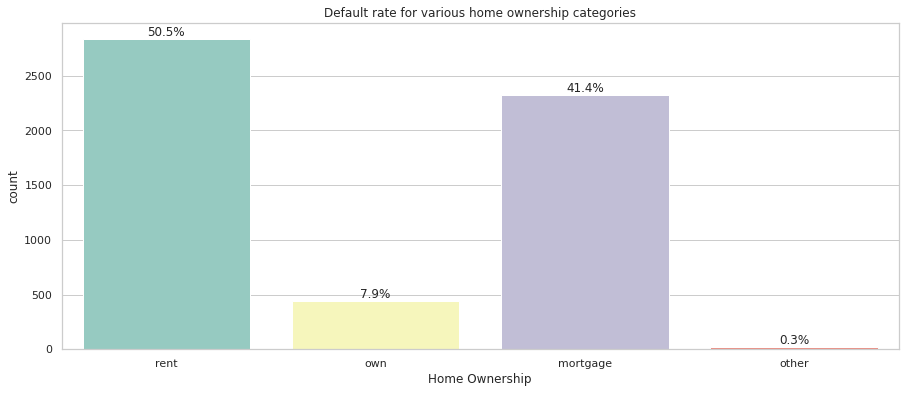

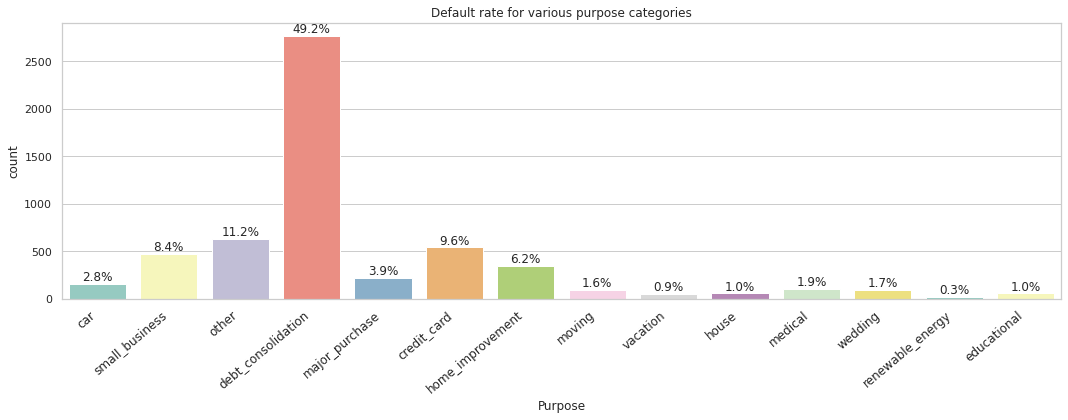

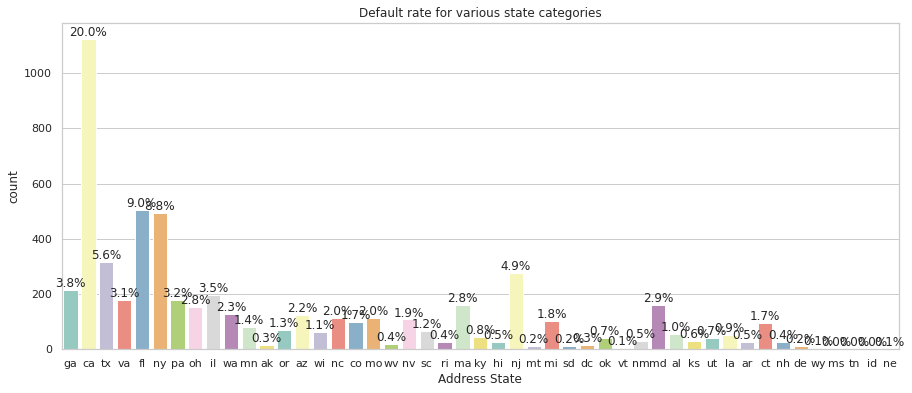

In [2218]:
# Let's plot countplots for all the unordered categorical variable
# 'home_ownership', 'purpose', 'addr_state'

count_plotter("home_ownership",loan_data_defaulted,'Home Ownership','Default rate for various home ownership categories')
count_plotter("purpose",loan_data_defaulted,'Purpose','Default rate for various purpose categories',None, 1)
count_plotter("addr_state",loan_data_defaulted,'Address State','Default rate for various state categories')

### Observations

1. The ratio of the top item to the second item is almost same expect in some cases at the end like for 'addr_state'. In general, it follows a straight line which means a geometric progression.

2. Therefore, we can say that columns below **follows power law distribution:**

> 'home_ownership', 'purpose', 'addr_state'

3. **92%** of the people who have defaulted the loan are living on **rent or mortgage.**

4. **Around 49%** of the defaulted loan is taken for **debt consolidation**.

5. **20%** defaulted loans are taken from California state.

## Univariate Analysis: Ordered Categorical Variables

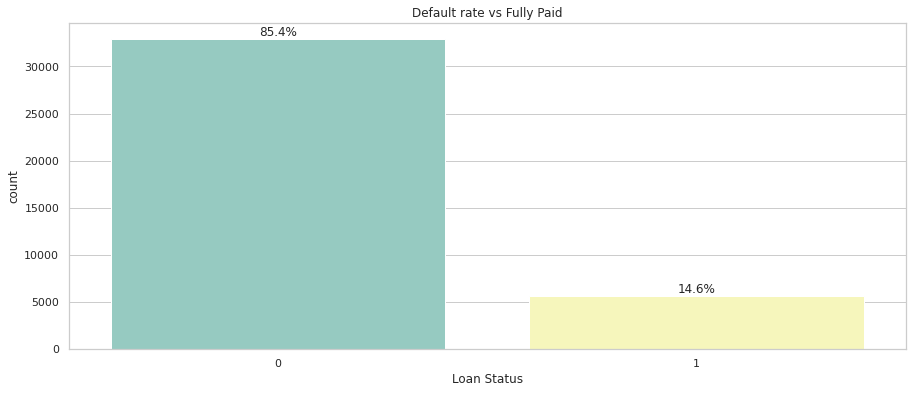

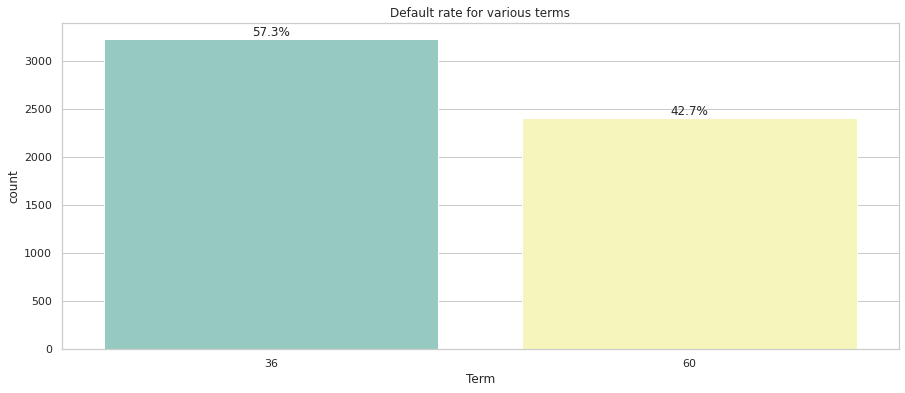

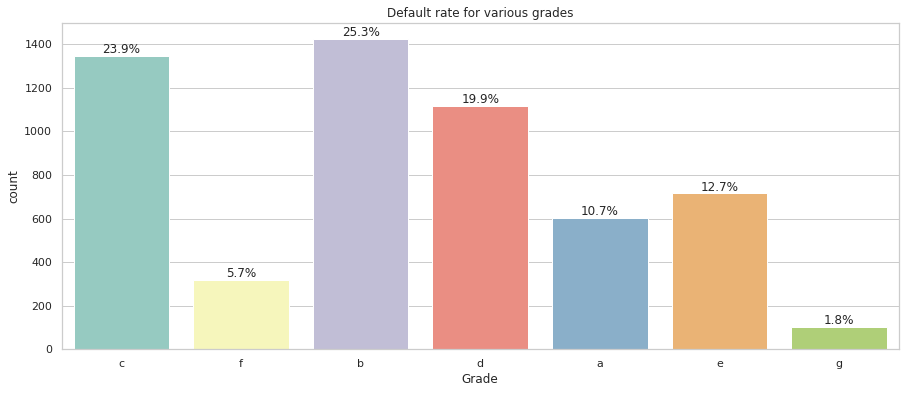

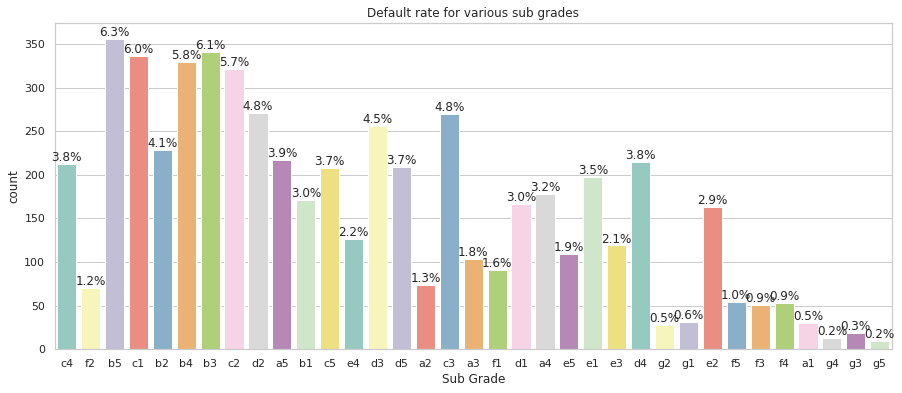

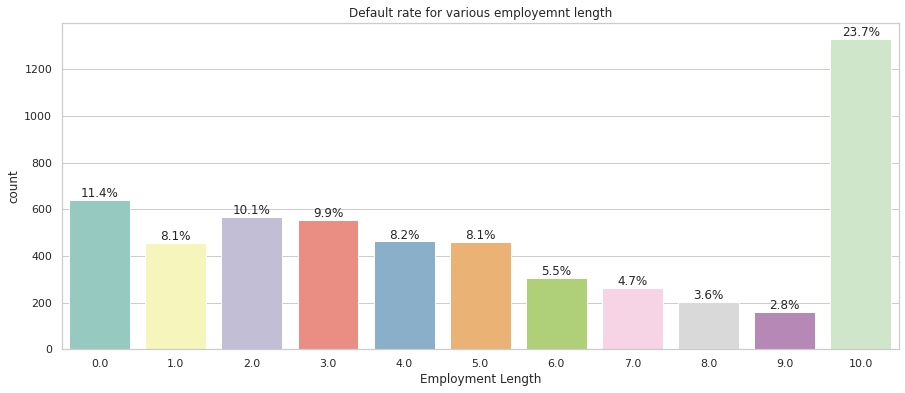

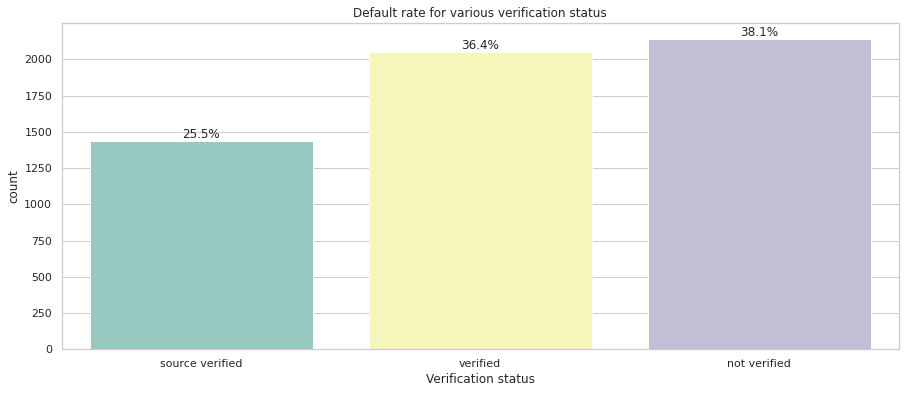

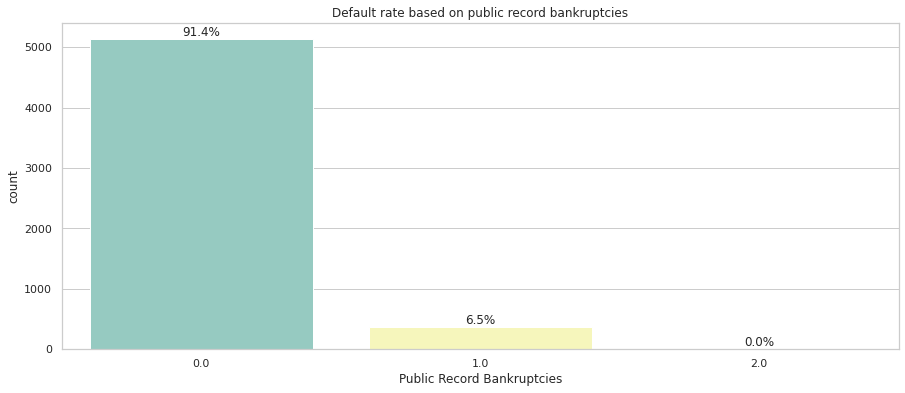

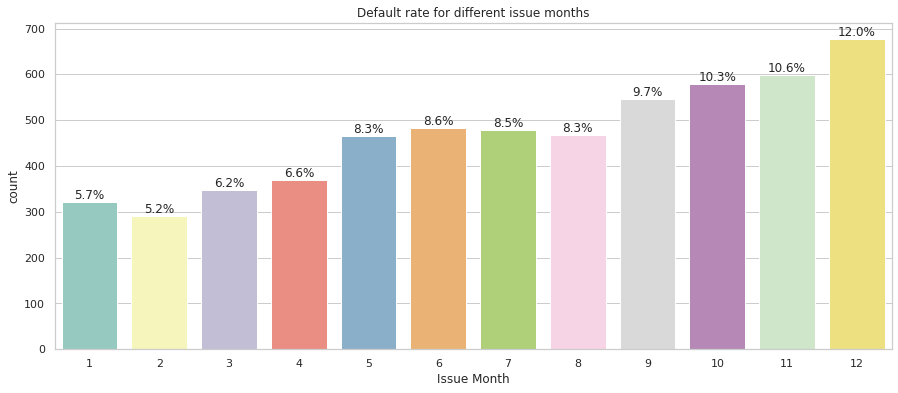

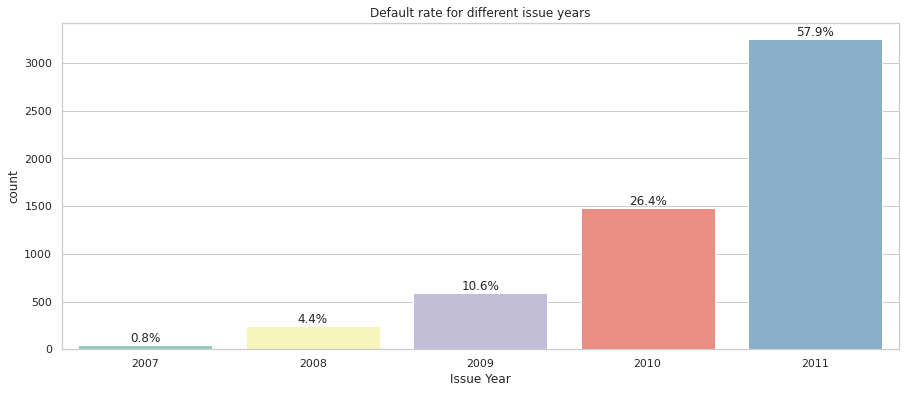

In [2219]:
# Let's plot countplots for all the ordered categorical variable
#'term', 'grade', 'sub_grade', 'emp_length', 'verification_status', 'pub_rec_bankruptcies', 'issue_month', 'issue_year'

count_plotter("loan_status",loan_data,'Loan Status','Default rate vs Fully Paid')
count_plotter("term",loan_data_defaulted,'Term','Default rate for various terms')
count_plotter("grade",loan_data_defaulted,'Grade','Default rate for various grades')
count_plotter("sub_grade",loan_data_defaulted,'Sub Grade','Default rate for various sub grades')
count_plotter("emp_length",loan_data_defaulted,'Employment Length','Default rate for various employemnt length')
count_plotter("verification_status",loan_data_defaulted,'Verification status','Default rate for various verification status')
count_plotter("pub_rec_bankruptcies",loan_data_defaulted,'Public Record Bankruptcies','Default rate based on public record bankruptcies')
count_plotter("issue_month",loan_data_defaulted,'Issue Month','Default rate for different issue months')
count_plotter("issue_year",loan_data_defaulted,'Issue Year','Default rate for different issue years')

### Observations
**14.6%** loan applicants have **defaulted** out of which:

1. **57%** of defaulted loan tenures are 36 months.
2. **49%** of defaulted loans are in **grade b and c**
3. Similarly **sub-grades b5, b3, c1, b4, c2** have defaulted more than other sub-grades  
4. **~24%** of defaulted loans have been taken by **10+ years** experienced employee, followed by **~11%** from employee having less than **1 years** of experience.
5. **25.5%** of defaulted loan has been source verified which is the least.
6. Only **6.5%** defaulted loan have public record of bankruptcies.
7. There is a increasing trend of defaulted loans every month.
8. Defaulted loans are increasing every year with **58%** defaulted loans in **2011**.

## Univariate Analysis: Quantitative Variables

In [2220]:
# Writing a function to plot boxplots of different quantitative variables to do univariate analysis

def box_plotter(x_var,df,x_label,title,y_var=None,y_label=None,hue_var=None,fig_size_x=15,fig_size_y=6):
    ncount = len(df)
    dims = (fig_size_x,fig_size_y)
    plt.figure(figsize=dims)
    ax = sns.boxplot(x=x_var, y=y_var, data=df,hue=hue_var,palette="Set3")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

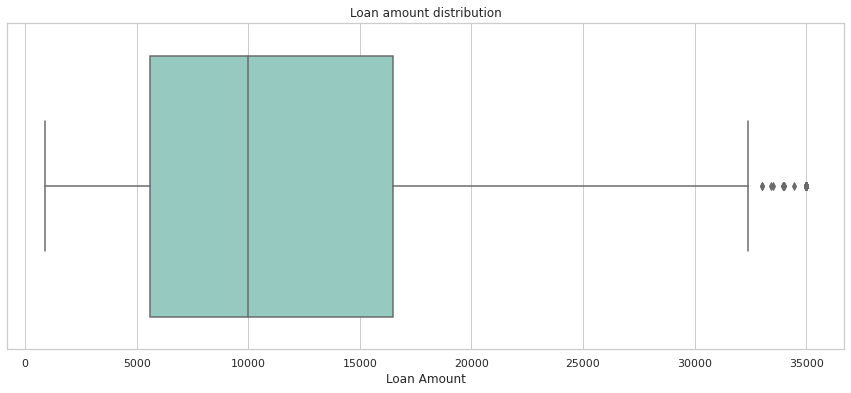

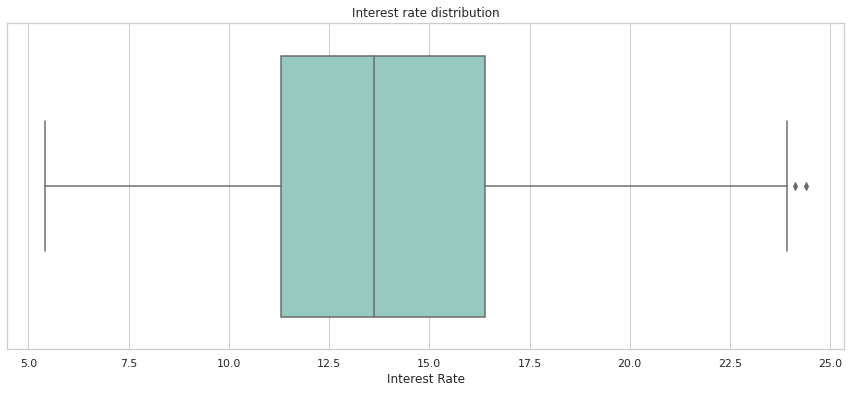

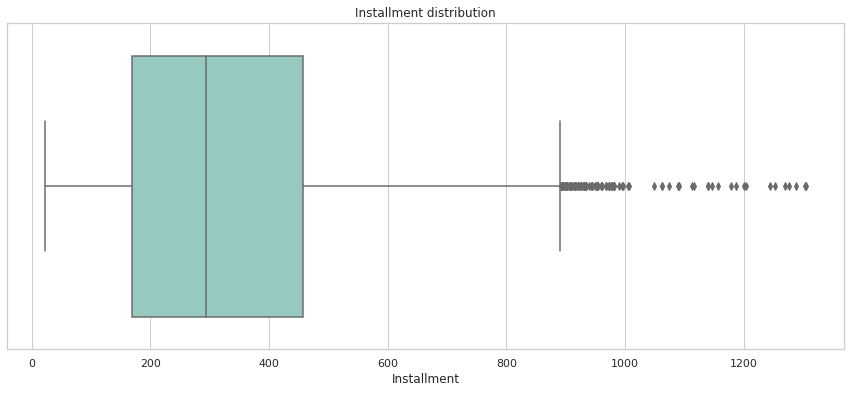

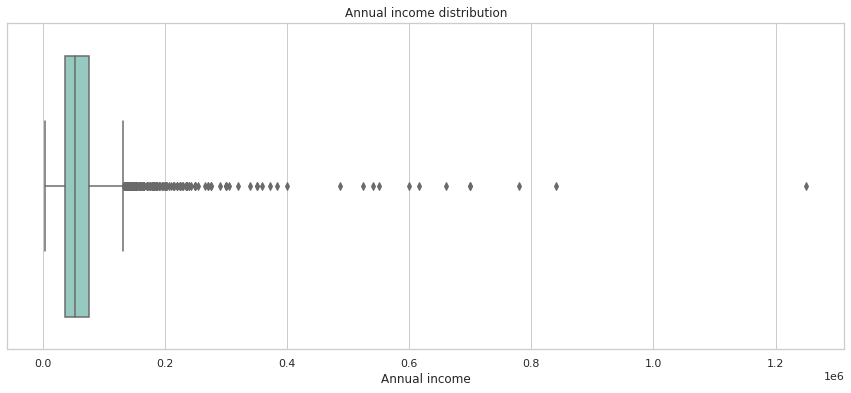

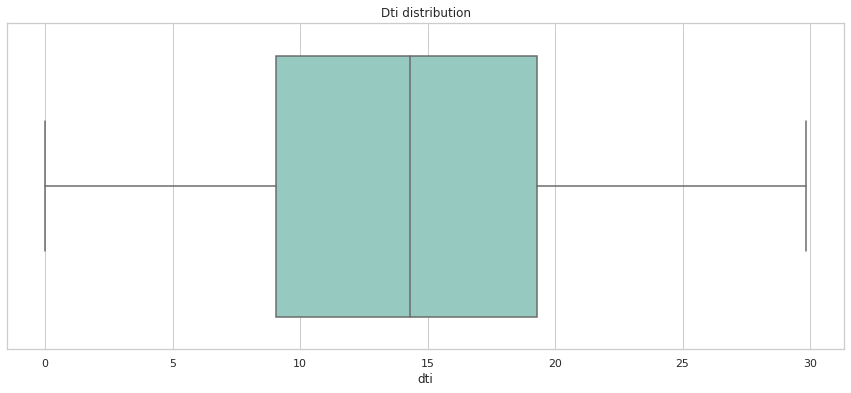

In [2221]:
# Let's plot box plot for all quantitative variables
# 'loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti'

box_plotter("loan_amnt",loan_data_defaulted,'Loan Amount','Loan amount distribution')
box_plotter("int_rate",loan_data_defaulted,'Interest Rate','Interest rate distribution')
box_plotter("installment",loan_data_defaulted,'Installment','Installment distribution')
box_plotter("annual_inc",loan_data_defaulted,'Annual income','Annual income distribution')
box_plotter("dti",loan_data_defaulted,'dti','Dti distribution')

In [2222]:
# Let's create bins and derive columns for all quantitative variables
# 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti'

# Create bins and labels
loan_amnt_bins = [0, 5000, 10000, 15000, 20000, 25000,40000]
loan_amnt_labels = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000', '25000 and above']

int_rate_bins = [5, 9, 13, 17, 21, 25]
int_rate_labels = ['5%-9%', '9%-13%', '13%-17%', '17%-21%', '21% and above']

installment_bins = [0, 250, 500, 750, 1000, 1400]
installment_labels = ['0-250', '250-500', '500-750', '750-1000', '1000 and above']

annual_inc_bins = [0, 25000, 50000, 75000, 100000,1000000]
annual_inc_labels = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']

dti_bins = [0, 5, 10, 15, 20, 25, 30]
dti_labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30']

loan_data_defaulted['loan_amnt_range'] = pd.cut(loan_data_defaulted['loan_amnt'], bins = loan_amnt_bins, labels=loan_amnt_labels)
loan_data_defaulted['int_rate_range'] = pd.cut(loan_data_defaulted['int_rate'], bins = int_rate_bins, labels=int_rate_labels)
loan_data_defaulted['installment_range'] = pd.cut(loan_data_defaulted['installment'], bins = installment_bins, labels=installment_labels)
loan_data_defaulted['annual_inc_range'] = pd.cut(loan_data_defaulted['annual_inc'], bins = annual_inc_bins, labels=annual_inc_labels)
loan_data_defaulted['dti_range'] = pd.cut(loan_data_defaulted['dti'], bins = dti_bins, labels=dti_labels)

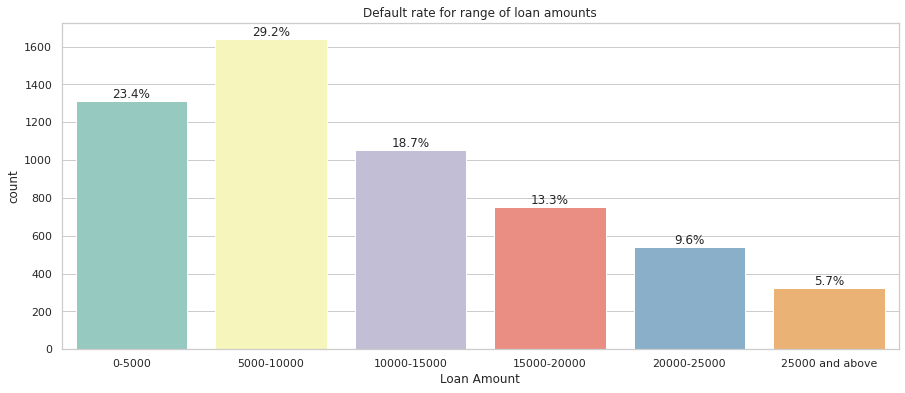

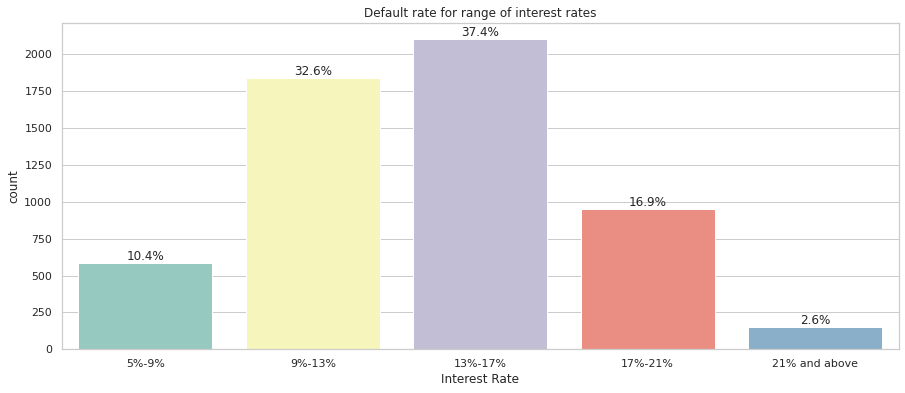

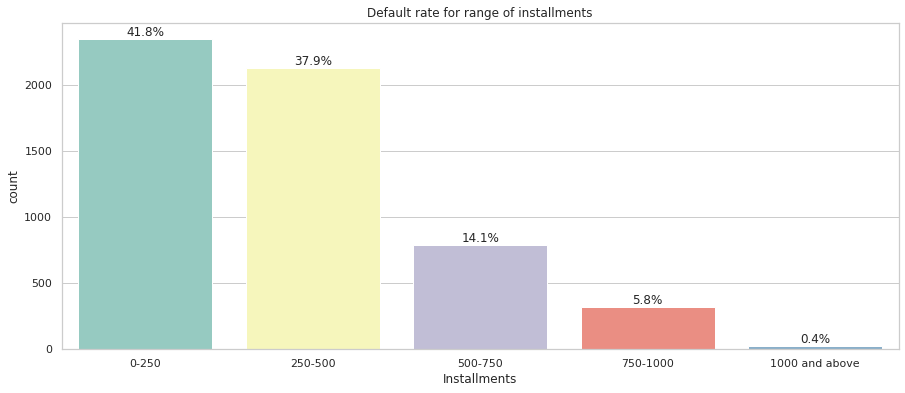

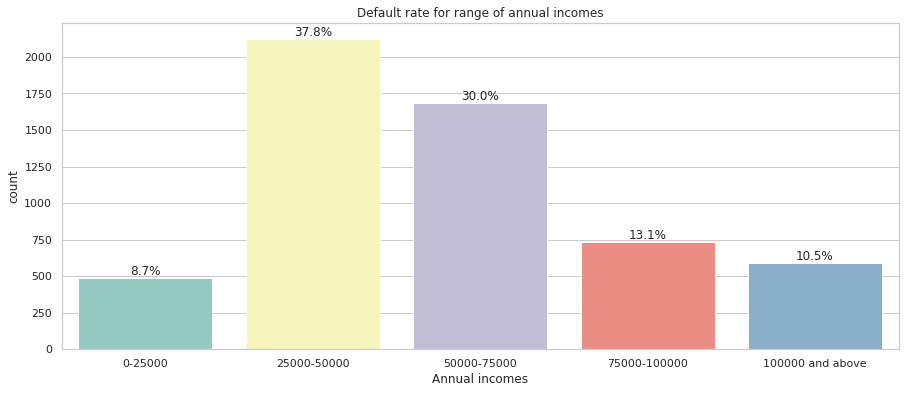

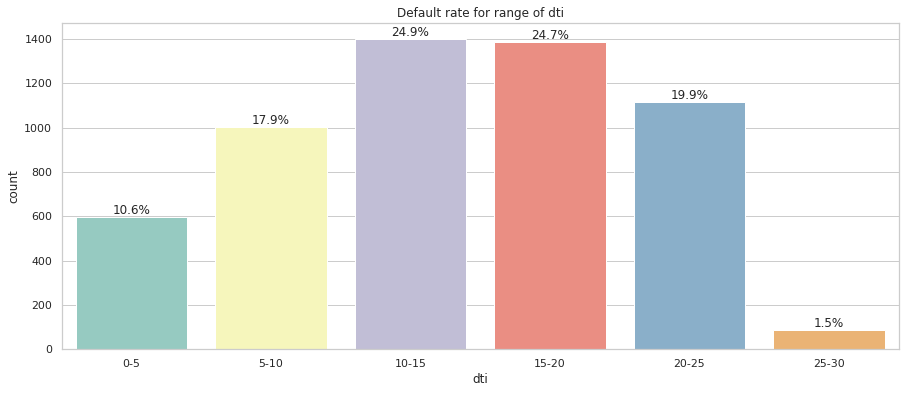

In [2223]:
# Let's plot countplots for all newly derived ranges of quantitative variables
# 'loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti'

count_plotter("loan_amnt_range",loan_data_defaulted,'Loan Amount','Default rate for range of loan amounts')
count_plotter("int_rate_range",loan_data_defaulted,'Interest Rate','Default rate for range of interest rates')
count_plotter("installment_range",loan_data_defaulted,'Installments','Default rate for range of installments')
count_plotter("annual_inc_range",loan_data_defaulted,'Annual incomes','Default rate for range of annual incomes')
count_plotter("dti_range",loan_data_defaulted,'dti','Default rate for range of dti')

### Observations
1. IQR(Interquartile Range) of **loan amount** is in **900-35000**. It has multiple outliers
2. IQR of **interest rate** and **dti** of defaulted loans is in **11-16%**. It has only **two outliers.**
3. IQR of **installment** of defaulted loans is in **168-457 dollars** with **many outliers.**
4. IQR of **annual income** of defaulted loans is in **37000-75000 dollars** with **huge outliers.**
5. IQR of **dti** of defaulted loans is in **9-19** with **no outliers.**
6. **~30%** of the defaulted loans have taken **5-10k loan amount.**
7. **37%** of defaulted loans belong to **13-17% interest rate**.
8. **~42%** of defaulted loans have **less than 250 dollar installments**
9. **~38%** of defaulted loans have **25-50k annual incomes**.
10. **~50%** of the defaulted loans have **10-20 dti.**

## Univariate Analysis: Summary / Insights

**`3 unordered categorical variables shows that`** <br><br> `They follow power law distribution and majority of loan defaulters have been living on rent or mortgage.` <br><br> `Also, half of the defaulted loan have been taken for debt consolidation.` <br><br> `And California state has highest number of defaulted loans.` <br><br>

**`9 ordered categorical variables shows that`** <br><br> `~15% of loan applicants have defaulted.` <br><br> `Short tenure loans are defaulted slightly more.` <br><br> `Almost half of the defaulted loans are from grade b and c primarily belonging to b3, b4, b5, c1 and c2 sub-grades.` <br><br> `Almost a quarter of loan default have been done by employee having 10+ years of experience followed by employee having less than one year of experience.` <br><br> `Source verified loans are defaulting much less.` <br><br> `There is a overall increasing trend of defaulted loans every month of each year which shows loans taken at the end of the year have more chances of defaulting.` <br><br> `Defaulted loans are increasing every year which could be because of more applications filed every year.` <br><br>

**`7 quantitative variables shows that`** <br><br> `Loan amount has multiple outliers and Interest rate, dti have very few or no outliers.` <br><br> `Installment and annual income have huge outliers.` <br><br> `~70% of the defaulted loan amounts are smaller i.e. within range of 0-15k amount.` <br><br> `~70% of defaulted loans belong to mid range interest rate i.e. 9-17%.` <br><br> `~80% of defaulted loans have smaller installments less than 500.` <br><br> `~70% of defaulted loans have annual incomes between 25-75k.` <br><br> `Half of the defaulted loans have dti between 10-20.`

# Derived Metrics

In [2224]:
# Creating Derived Columns for further analysis
# Let's use created bins and derive columns for all quantitative variables
# loan_data amount to Annual Income ratio
loan_data['loan_amnt_range'] = pd.cut(loan_data['loan_amnt'], bins = loan_amnt_bins, labels=loan_amnt_labels)
loan_data['int_rate_range'] = pd.cut(loan_data['int_rate'], bins = int_rate_bins, labels=int_rate_labels)
loan_data['installment_range'] = pd.cut(loan_data['installment'], bins = installment_bins, labels=installment_labels)
loan_data['annual_inc_range'] = pd.cut(loan_data['annual_inc'], bins = annual_inc_bins, labels=annual_inc_labels)
loan_data['dti_range'] = pd.cut(loan_data['dti'], bins = dti_bins, labels=dti_labels)
loan_data['loan_inc_ratio']= loan_data['loan_amnt']/loan_data['annual_inc']

# Bivariate Analysis

## Continous variables: correlation matrix

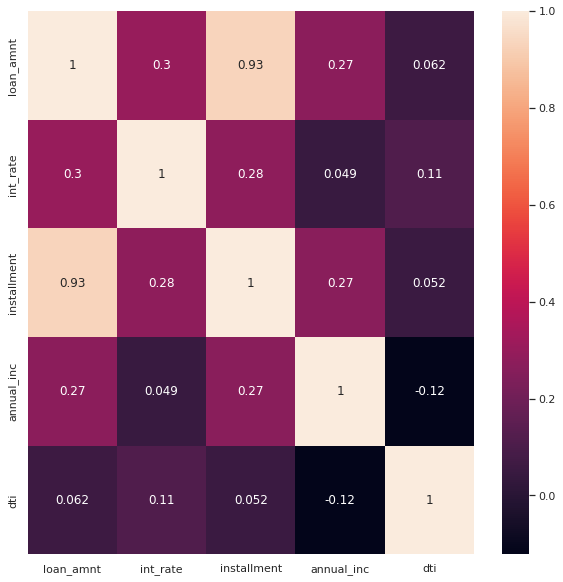

In [2225]:
# Correlation between different continous variables

loan_data_continous = loan_data[['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti']]

plt.figure(figsize=(10,10))
corrMatrix = loan_data_continous.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

### Observations
1. High correlation between loan amount and installment. Which makes sense as the loan amount increases the installment will be bigger.
2. No significant correlation between other variables.

## Categorical variables 

In [2226]:
# Writing a function to plot barplots of different categorical variables to do bivariate analysis

def bar_plotter(df,x_var,x_label,y_var,y_label,hue_var,title,rot_flag=0,fig_size_x=15,fig_size_y=6):
    ncount = len(df)
    dims = (fig_size_x,fig_size_y)
    plt.figure(figsize=dims)
    ax = sns.barplot(x=x_var, y=y_var, data=df, hue =hue_var, palette="deep")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    if(rot_flag==1):
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
        plt.tight_layout()


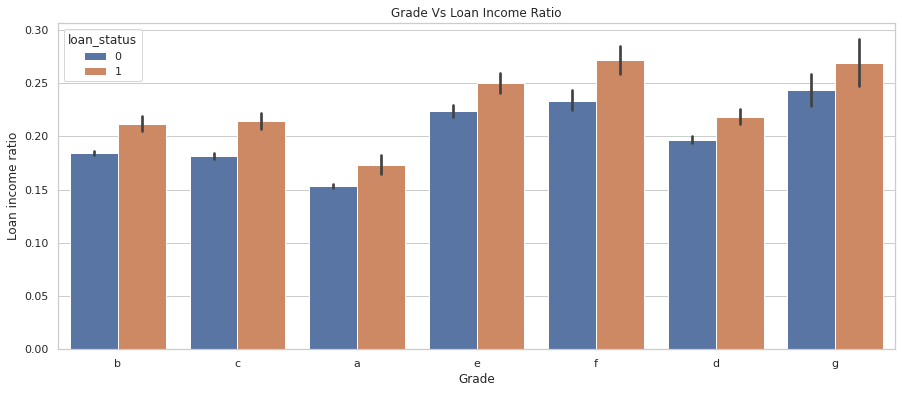

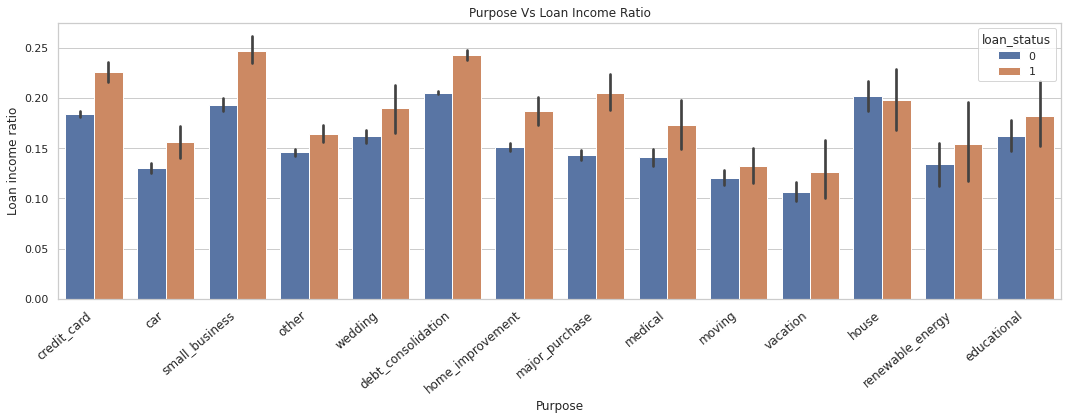

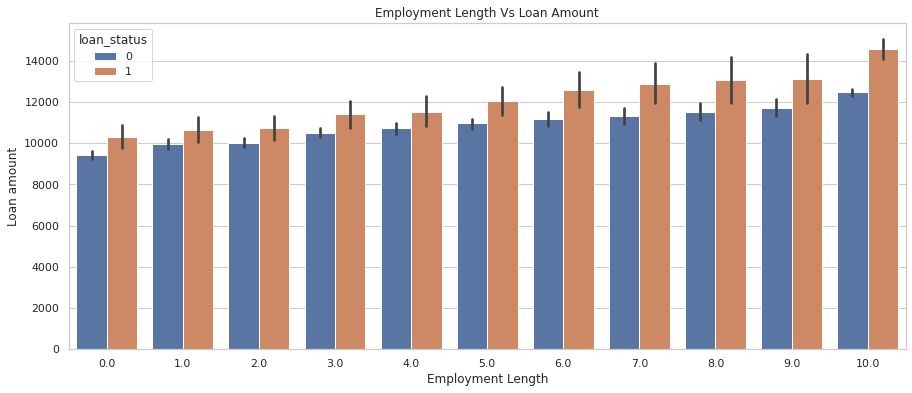

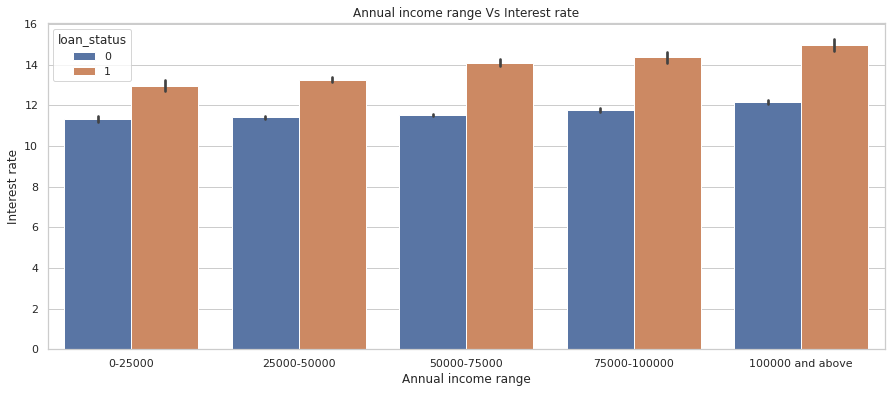

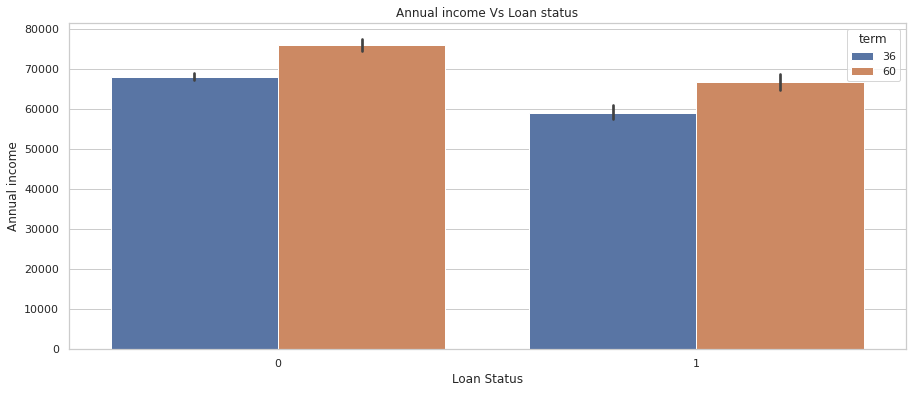

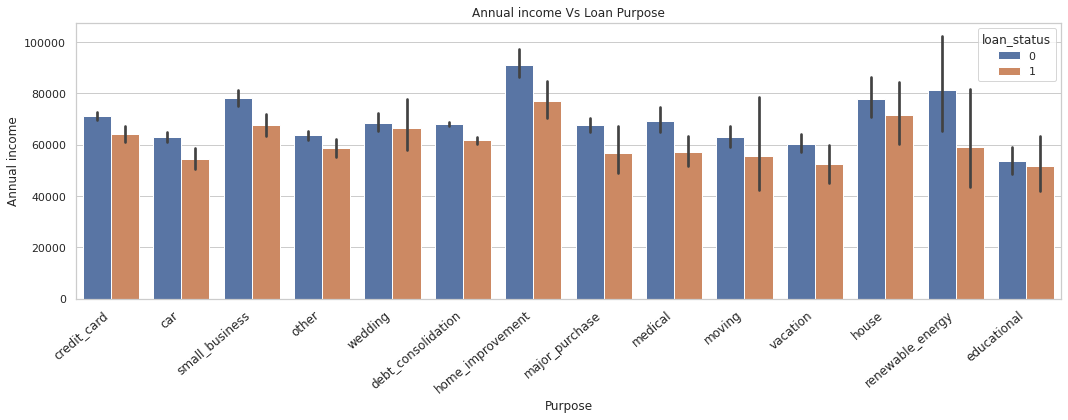

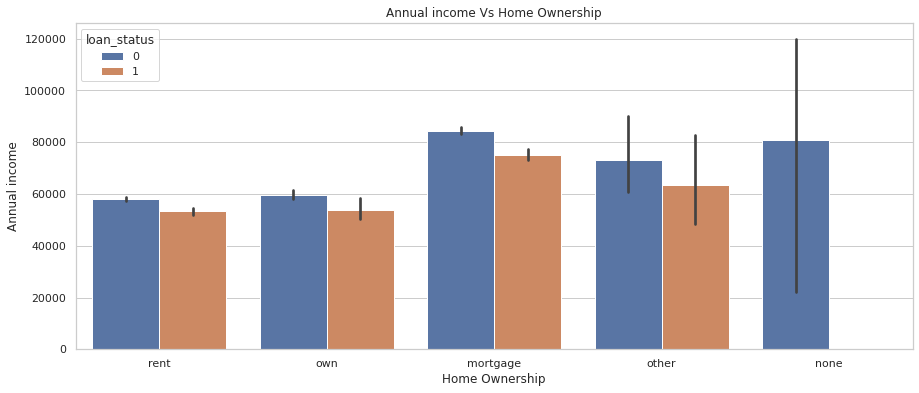

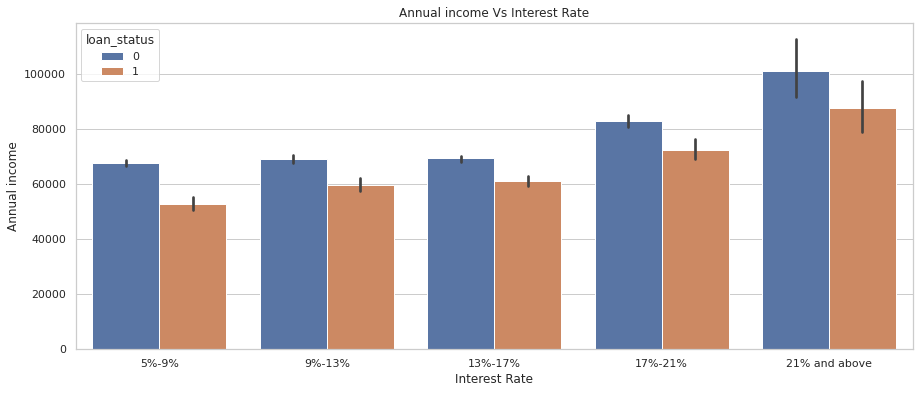

In [2227]:
# Loan income ratio vs Grade and Purpose

bar_plotter(loan_data, 'grade', 'Grade', 'loan_inc_ratio', 'Loan income ratio', 'loan_status', 'Grade Vs Loan Income Ratio')
bar_plotter(loan_data, 'purpose', 'Purpose', 'loan_inc_ratio', 'Loan income ratio', 'loan_status', 'Purpose Vs Loan Income Ratio', 1)

# Employment length vs Loan amount
bar_plotter(loan_data, 'emp_length', 'Employment Length', 'loan_amnt', 'Loan amount', 'loan_status', 'Employment Length Vs Loan Amount')

# Annual income range vs Interest Rate
bar_plotter(loan_data, 'annual_inc_range', 'Annual income range', 'int_rate', 'Interest rate', 'loan_status', 'Annual income range Vs Interest rate')

# Loan_status vs Annual increment for different terms
bar_plotter(loan_data, 'loan_status', 'Loan Status', 'annual_inc', 'Annual income', 'term', 'Annual income Vs Loan status')


# Annual income vs Loan purpose, Home ownership, Interest rate

bar_plotter(loan_data, 'purpose', 'Purpose', 'annual_inc', 'Annual income', 'loan_status', 'Annual income Vs Loan Purpose', 1)
bar_plotter(loan_data, 'home_ownership', 'Home Ownership', 'annual_inc', 'Annual income', 'loan_status', 'Annual income Vs Home Ownership')
bar_plotter(loan_data, 'int_rate_range', 'Interest Rate', 'annual_inc', 'Annual income', 'loan_status', 'Annual income Vs Interest Rate')



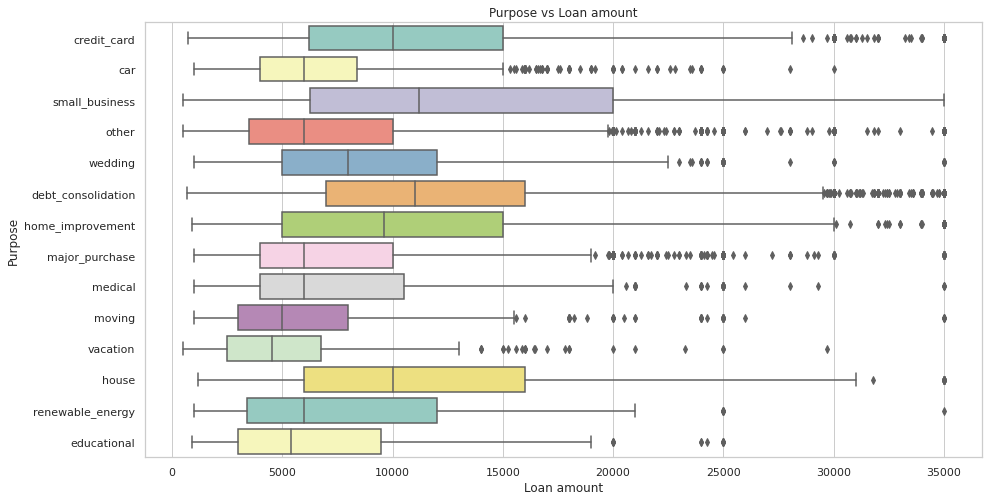

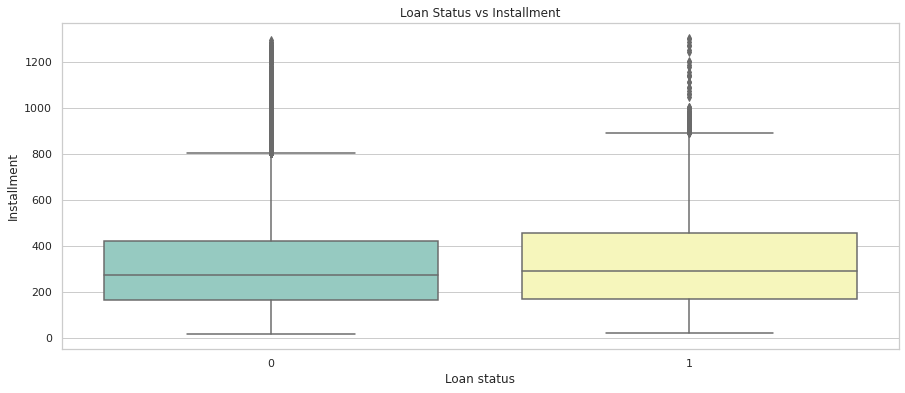

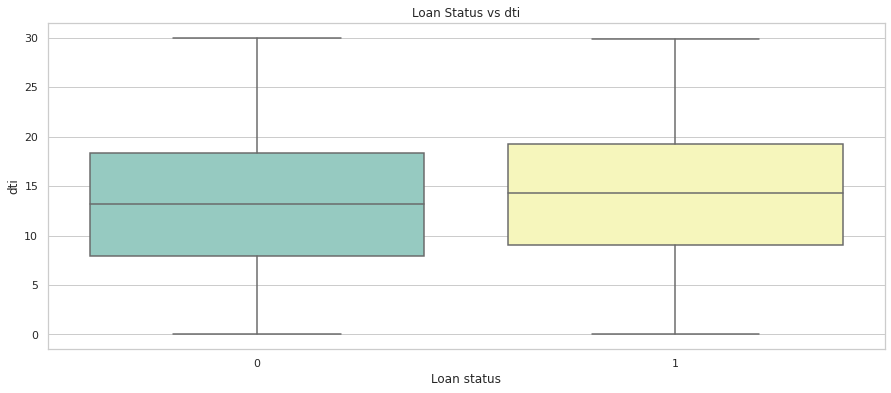

In [2228]:
# Box plot between Loan amount and Purpose

box_plotter("loan_amnt",loan_data,'Loan amount','Purpose vs Loan amount','purpose', 'Purpose', None, 15, 8)


# Box plot between Loan status and others
box_plotter("loan_status",loan_data,'Loan status','Loan Status vs Installment','installment', 'Installment')
box_plotter("loan_status",loan_data,'Loan status','Loan Status vs dti','dti', 'dti')

### Observations
1. The Loan income ratio is higher for G followed by F and E.
2. The Loan income ratio is more for small_business,debt_consolidation,house,educational and credit_card compare to others.
3. Maximum loan amount has been usually given to application with 10+ years of employment.
4. The int_rate is gradually increasing for annual incomes.
5. The "fully paid" is increasing with increasing in annual income.
6. The highest loan amount compared to others is given for small business purpose. 
7. Loans with less instalments are having maximum charged off.
8. The loan with overall higher DTI are getting Charged Off more.

## Bivariate Analysis: Summary / Insights

`High correlation between loan amount and installment. Which makes sense as the loan amount increases the installment will be bigger.` <br><br> `No significant correlation between other variables.` <br><br> `The Loan income ratio is higher for G followed by F and E.` <br><br> `The Loan income ratio is more for small_business,debt_consolidation,house,educational and credit_card compare to others.` <br><br> `Maximum loan amount has been usually given to application with 10+ years of employment.` <br><br> `The int_rate is gradually increasing for annual incomes.` <br><br> `The "fully paid" is increasing with increasing in annual income.` <br><br> `The highest loan amount compared to others is given for small business purpose.` <br><br> `Loans with less instalments are having maximum charged off.` <br><br> `The loan with overall higher DTI are getting Charged Off more.`

# Recommendations

### <font color = blue>1. People living on rent or mortgage are likely to default more, hence proper verification and scrutiny should be done for these applicants.</font>

### <font color = blue>2. Applications stating the purpose of loan as debt consolidation, small business or credit card have high chances of default, hence proper scrutiny should be done for these applications.</font>

### <font color = blue>3. Loans with smaller installments which less than 500 have high chances of default, hence the installment of loans could be kept high and proper scrutiny should be done for these applications accordingly.</font>

### <font color = blue>4. Applications having mid level annual income are likely to default more, these loans should be handled with care.</font>

### <font color = blue>5. Loans should be approved only after income source verification rather than just verification or no verification to reduced the loan defaulting.</font>

### <font color = blue>6. Application having dti between 10-20 are likely to default more and should be considered as risky applications.</font>

### <font color = blue>7. Applications requesting loan amount of less than 15k are likely to default more and are risky applications.</font>

### <font color = blue>8. Applicants having 10+ years of experience or less than 1 years of experience are risky applicants.</font>

### <font color = blue>9. Applications assigned to b & c grades based on last credit are risky applications with more chance of default.</font>

### <font color = blue>10. Higher the loan term it is better as they have defaulted less according to dataset. Hence riskier loan should be given longer term in case there is a potential to approve the applicant.</font>

### <font color = blue>11. Loans approved in later part of the year i.e. October-December are more likely to default and hence proper scrutiny should be done.</font>

### <font color = blue>12. California state applications should be considered risky given they have defaulted more in the past. </font>